In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-aes/dataset.csv


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

In [45]:
data = pd.read_csv("/kaggle/input/spotify-aes/dataset.csv")
data.head(15)

Unnamed: 0                track_id                               artists  \
0            0  5SuOikwiRyPMVoIQDJUgSV                           Gen Hoshino   
1            1  4qPNDBW1i3p13qLCt0Ki3A                          Ben Woodward   
2            2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN   
3            3  6lfxq3CG4xtTiEg7opyCyx                          Kina Grannis   
4            4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
5            5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells   
6            6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera   
7            7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz   
8            8  0IktbUcnAGrvD03AWnz3Q8             Jason Mraz;Colbie Caillat   
9            9  7k9GuJYLp2AzqokyEdwEw2                        Ross Copperman   
10          10  4mzP5mHkRvGxdhdGdAH7EJ                          Zack Tabudlo   
11          11  5ivF4eQBqJiVL5IAE9jRyl                            Jason Mraz   
12          12  4ptDJbJl35d7gQfeNteBwp                              Dan Berk   
13          13  0X9MxHR1rTkEHDjp95F2OO                         Anna Hamilton   
14          14  4LbWtBkN82ZRhz9jqzgrb3              Chord Overstreet;Deepend   

                                           album_name  \
0                                              Comedy   
1                                    Ghost (Acoustic)   
2                                      To Begin Again   
3   Crazy Rich Asians (Original Motion Picture Sou...   
4                                             Hold On   
5                                Days I Will Remember   
6                         Is There Anybody Out There?   
7                 We Sing. We Dance. We Steal Things.   
8                 We Sing. We Dance. We Steal Things.   
9                                              Hunger   
10                                            Episode   
11                         Love Is a Four Letter Word   
12                                               Solo   
13                                           Bad Liar   
14                                    Hold On (Remix)   

                    track_name  popularity  duration_ms  explicit  \
0                       Comedy          73       230666     False   
1             Ghost - Acoustic          55       149610     False   
2               To Begin Again          57       210826     False   
3   Can't Help Falling In Love          71       201933     False   
4                      Hold On          82       198853     False   
5         Days I Will Remember          58       214240     False   
6                Say Something          74       229400     False   
7                    I'm Yours          80       242946     False   
8                        Lucky          74       189613     False   
9                       Hunger          56       205594     False   
10        Give Me Your Forever          74       244800     False   
11             I Won't Give Up          69       240165     False   
12                        Solo          52       198712     False   
13                    Bad Liar          62       248448     False   
14             Hold On - Remix          56       188133     False   

    danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0          0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1          0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2          0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3          0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4          0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
5          0.688  0.4810  ...    -8.807     1       0.1050        0.2890   
6          0.407  0.1470  ...    -8.822     1       0.0355        0.8570   
7          0.703  0.4440  ...    -9.331     1       0.0417        0.5590   
8          0.625  0.4

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [47]:
data['popularity'].value_counts()
#различные значения popularity

popularity
0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
96         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

In [48]:
sorted(data['popularity'].unique())
#возможные значения popularity

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [50]:
data = data.dropna()

In [51]:
data.shape

(113999, 21)

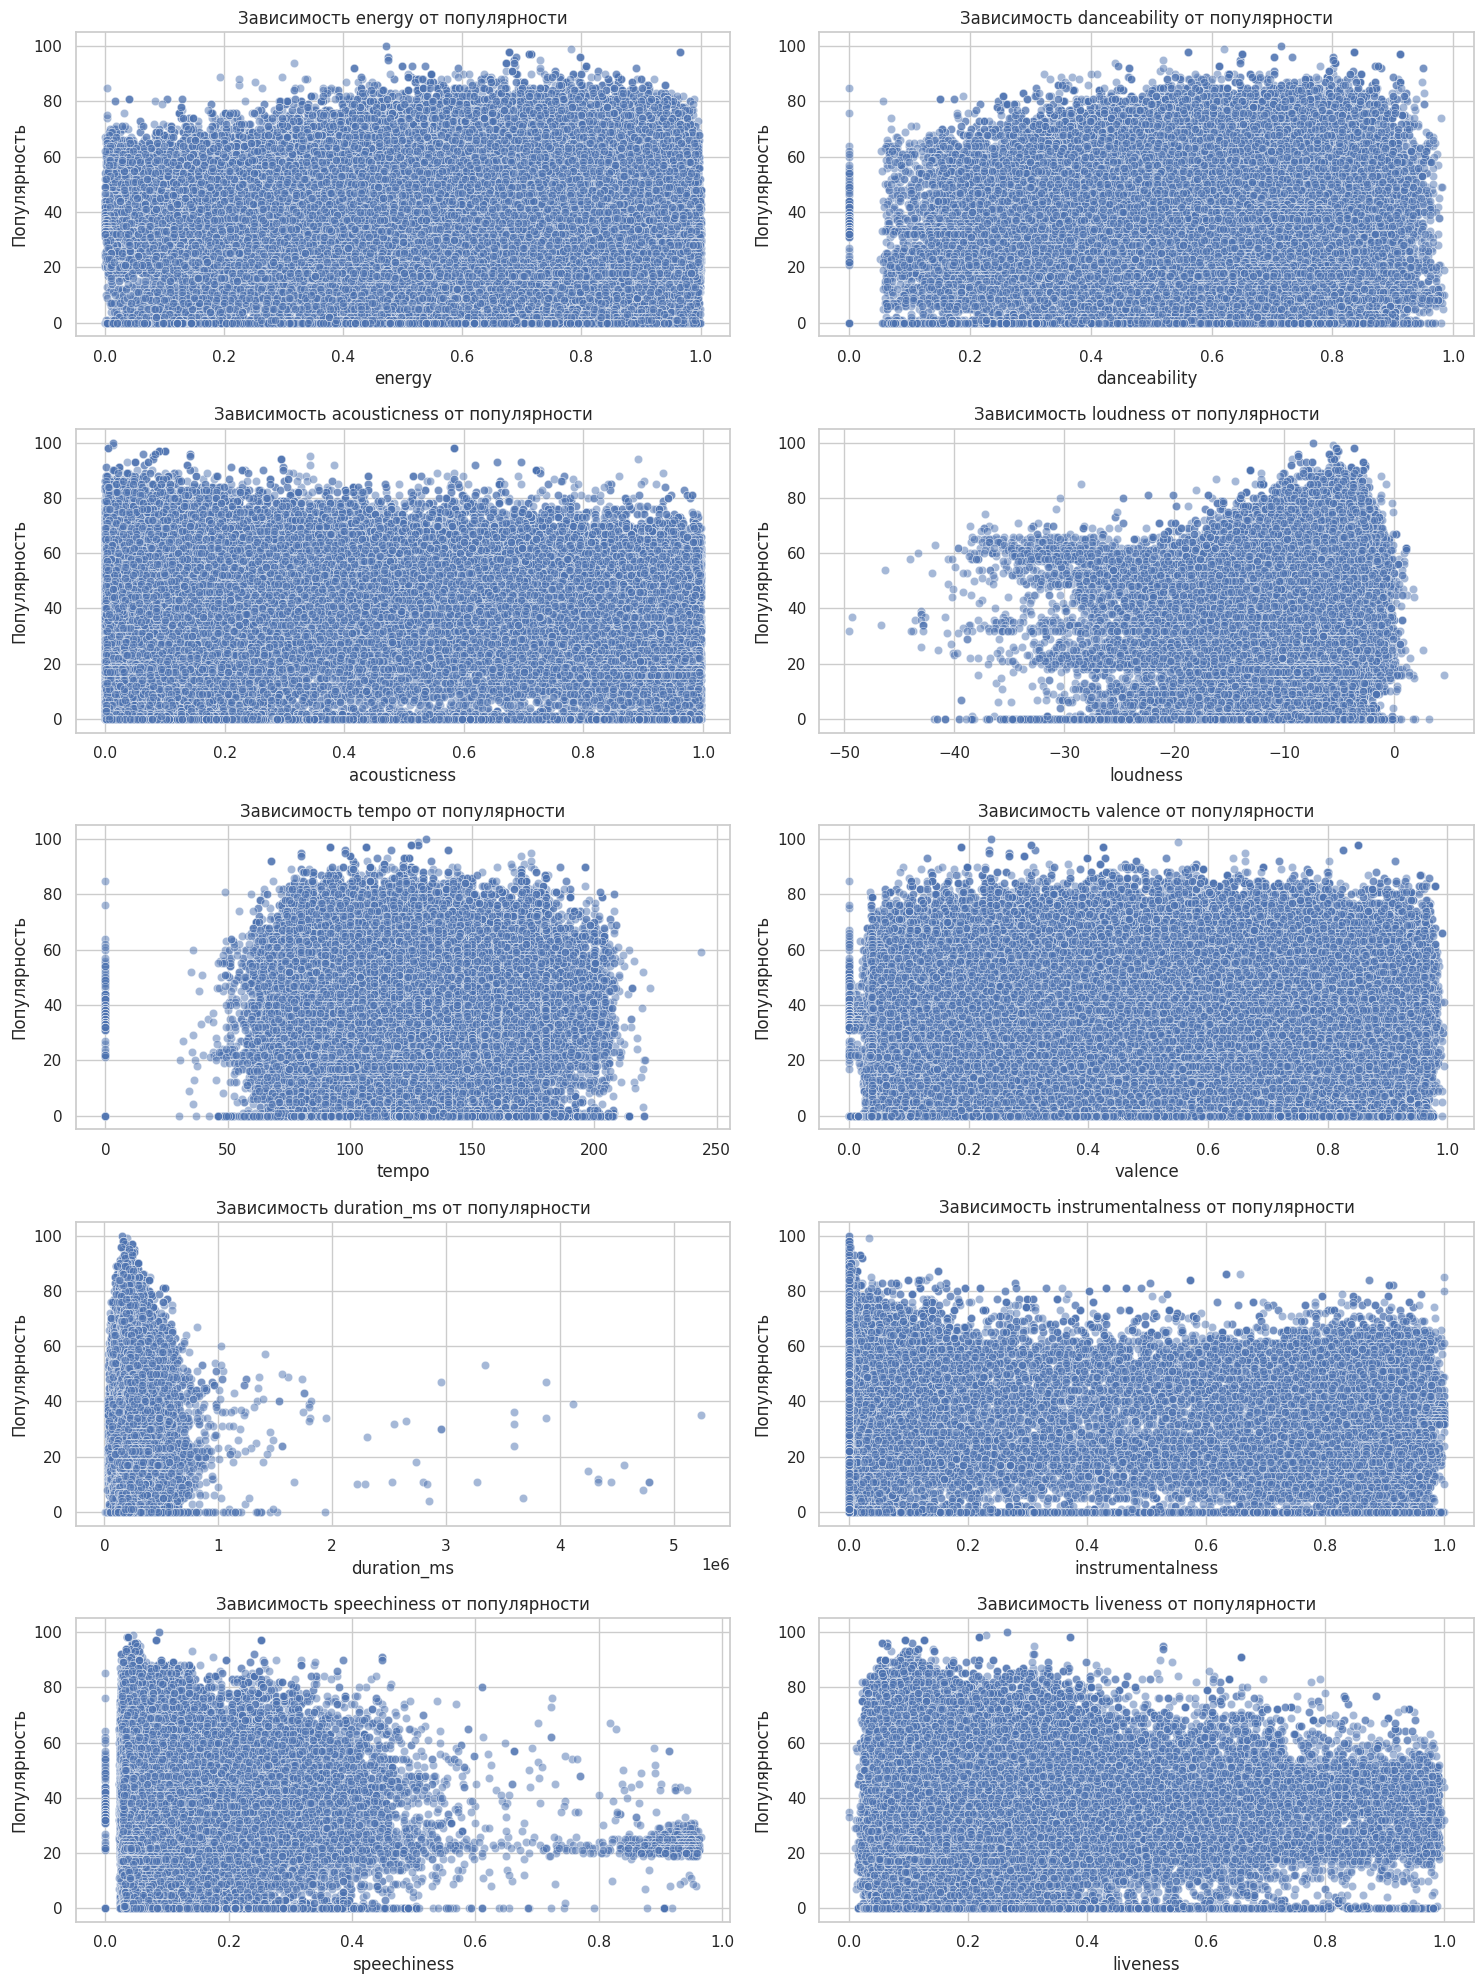

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data['popularity'] = pd.to_numeric(data['popularity'], errors = 'coerce') 

features = [
     'energy','danceability', 'acousticness', 'loudness',
     'tempo', 'valence', 'duration_ms', 'instrumentalness',
     'speechiness', 'liveness'] 

plt.figure(figsize = (15, 20))
for i, feature in enumerate (features, 1):
    plt.subplot(5, 2, i)
    sns.scatterplot (data=data, x=feature, y='popularity', alpha=0.5) 
    plt.title(f'Зависимость {feature} от популярности')
    plt.xlabel(feature)
    plt.ylabel('Популярность')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


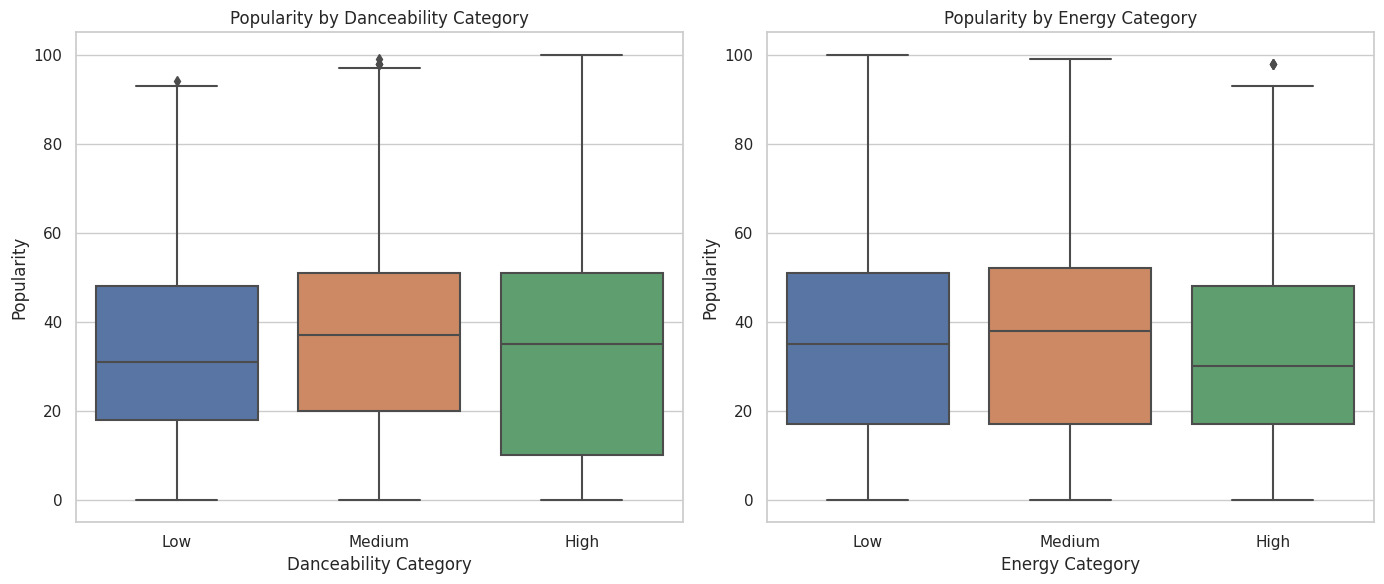

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = data
#
#
df['danceability_category'] = pd.qcut(df['danceability'], q=3, labels=['Low', 'Medium', 'High'])
df['energy_category'] = pd.qcut(df['energy'], q=3, labels=['Low', 'Medium', 'High'])
#
plt.figure(figsize=(14,6))
#
plt.subplot(1, 2, 1)
sns.boxplot (x = 'danceability_category', y = 'popularity', data = df)
plt.title("Popularity by Danceability Category")
plt.xlabel ("Danceability Category")
plt.ylabel ("Popularity")
plt.subplot (1, 2, 2)
sns.boxplot (x = 'energy_category', y ='popularity', data = df)
plt.title("Popularity by Energy Category")
plt.xlabel("Energy Category")
plt.ylabel ("Popularity")

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

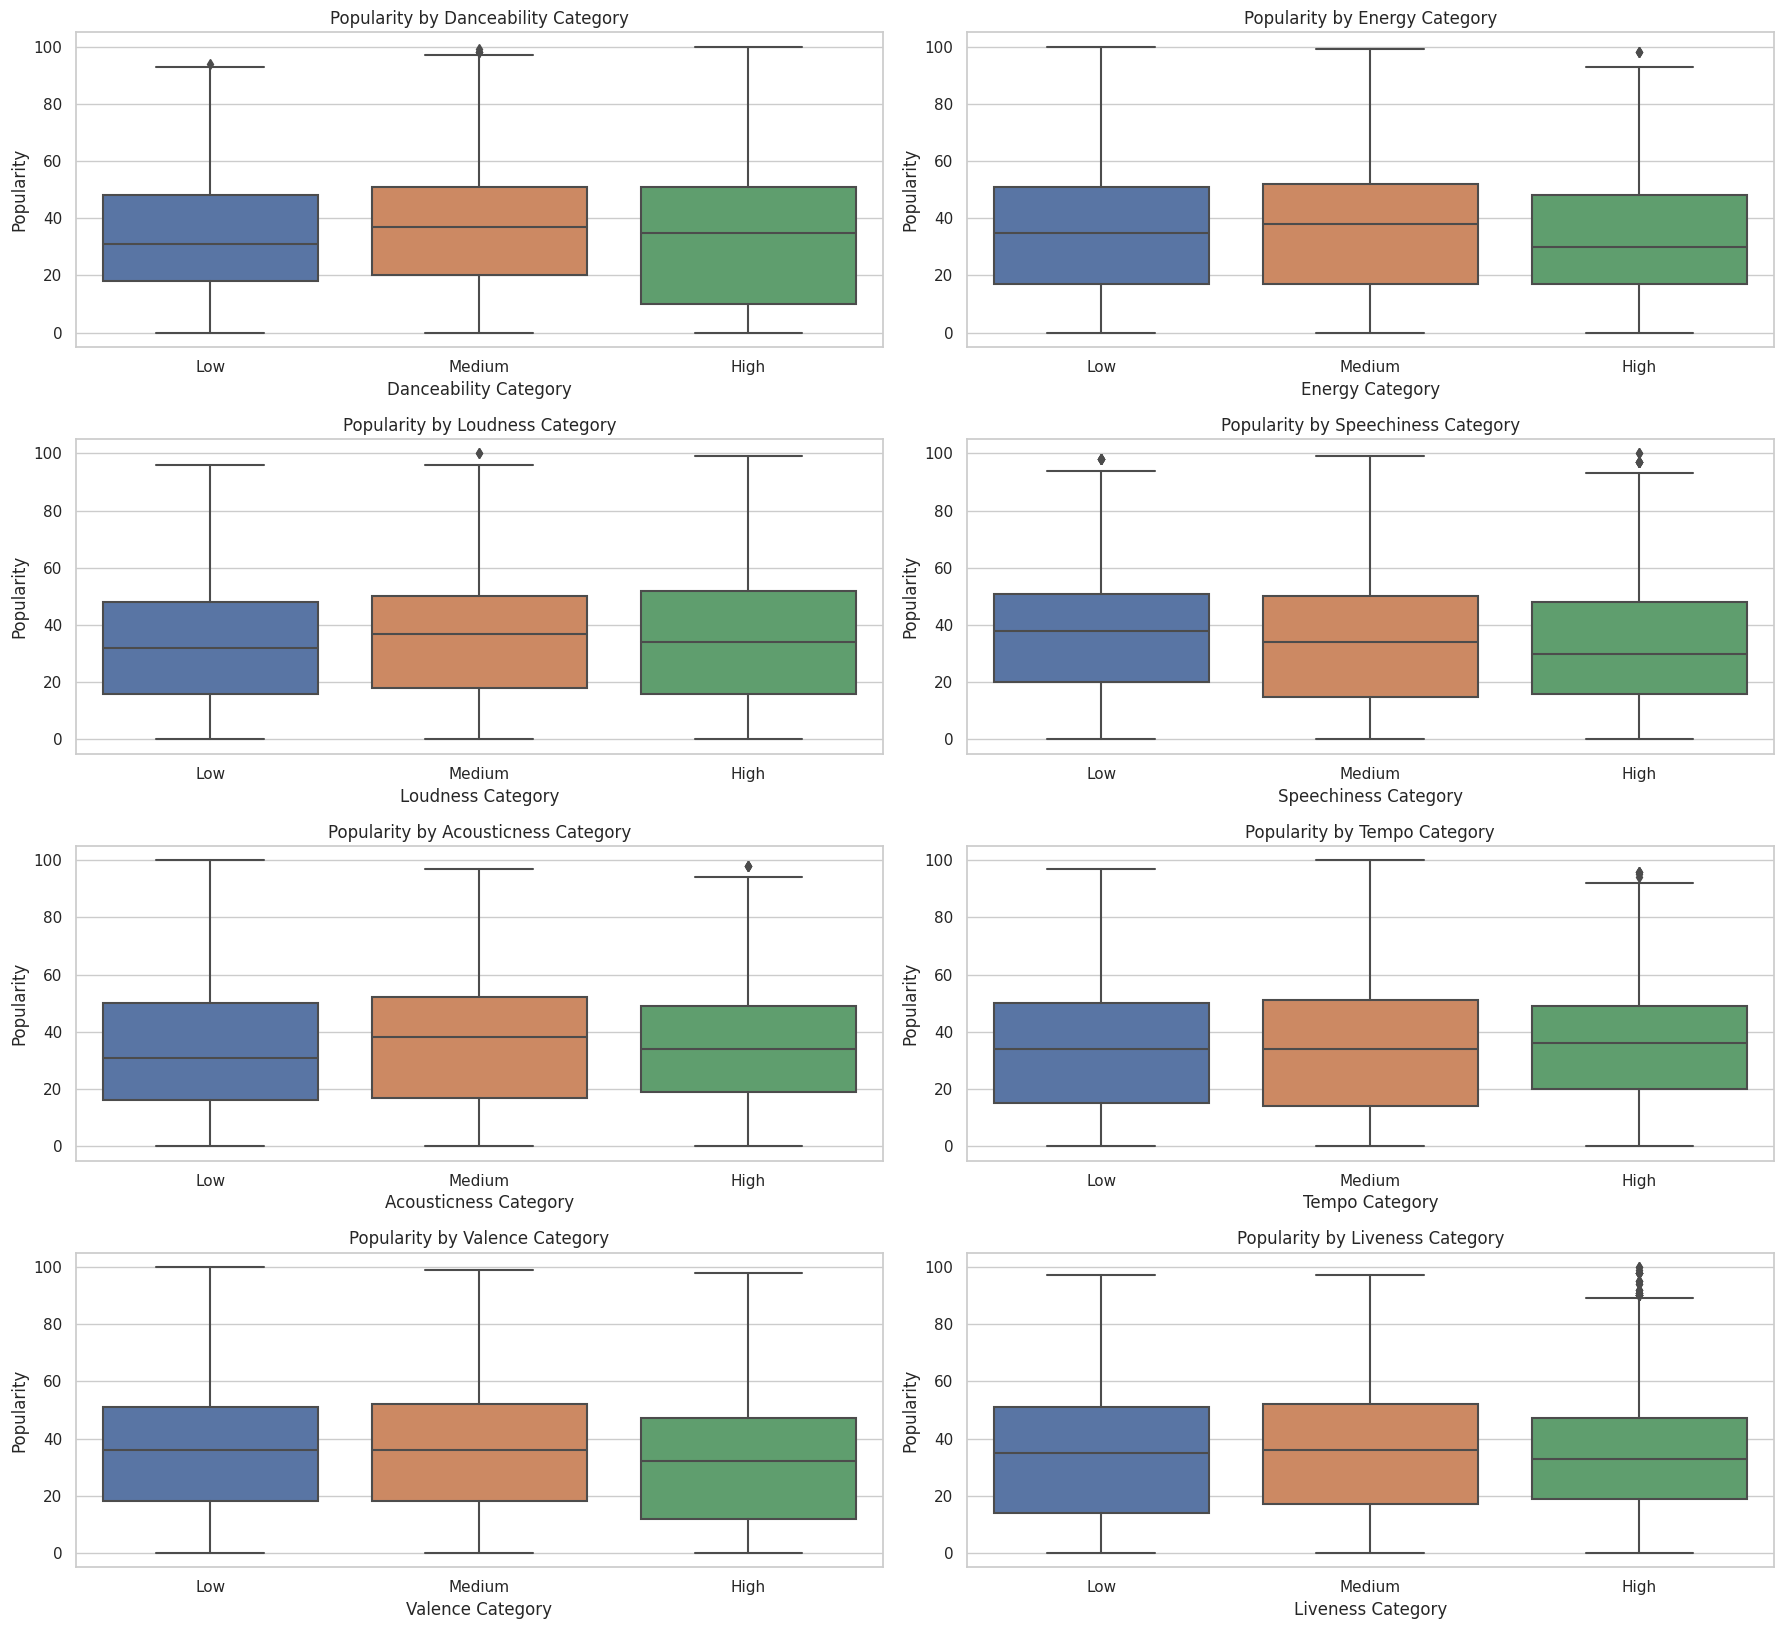

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Загрузка данных
df = data
# определение числовых признаков
numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'tempo', 'valence','liveness']
# создание категорий на основе квартилей для каждого признака
for column in numeric_columns:
    try:
        df[f'{column}_category'] = pd.qcut(df[column], q=3,labels=['Low', 'Medium', 'High'],duplicates= 'drop')
    except ValueError as e:
        print(f"Cannot create categories for{column}: {e}")
#стиль графиков
sns.set(style = "whitegrid")
# размер области для графиков
plt.figure(figsize=(18,20)) 
# построение графиков
for i, column in enumerate(numeric_columns, 1):
    if f'{column}_category' in df.columns:
        plt.subplot (5, 2, i)
        sns.boxplot (x = f'{column}_category', y = 'popularity', data = df)
        plt.title(f"Popularity by {column.capitalize()} Category")
        plt.xlabel (f"{column.capitalize()} Category")
        plt.ylabel ("Popularity")

# изображение всех графиков
plt.tight_layout()
plt.show()

Выводы: если оценивать по медианным значениям то средний уровень наиболее популярен среди:
Danceability
Energy
Loundness
Speechiness
Liveness
Valence

Низкий уровень наиболее популярен среди Acounsticness

Высокий уровень наиболее популярен среди: Tempo

Общий вывод: трек будет наиболее популярен если будет иметь средний уровень по признакам: danceability, energy, loundness, speechiness, valence, по аcounsticness низкий, а по tempo высокий.

data.info()

In [16]:
data['energy_category']

0         Low
1         Low
2         Low
3         Low
4         Low
         ... 
113995    Low
113996    Low
113997    Low
113998    Low
113999    Low
Name: energy_category, Length: 114000, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [17]:
data.groupby('explicit').popularity.value_counts()

explicit  popularity
False     0             14715
          44             2118
          22             2113
          21             2102
          43             1927
                        ...  
True      97                4
          93                3
          98                3
          92                2
          96                2
Name: count, Length: 199, dtype: int64

In [19]:
data.groupby('track_genre').popularity.value_counts()

track_genre  popularity
acoustic     0             56
             26            50
             51            46
             27            45
             28            43
                           ..
world-music  3              1
             11             1
             13             1
             67             1
             70             1
Name: count, Length: 6426, dtype: int64

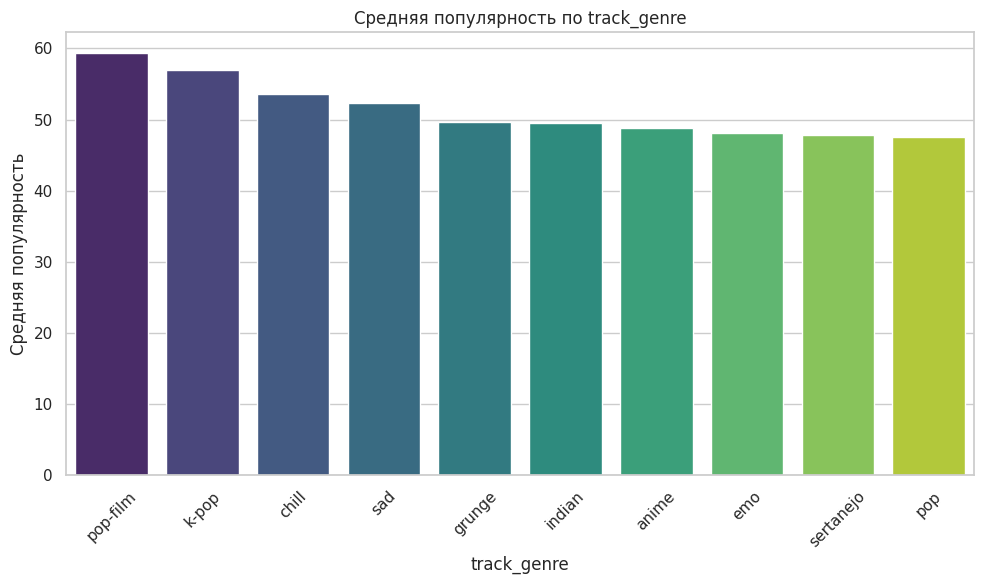

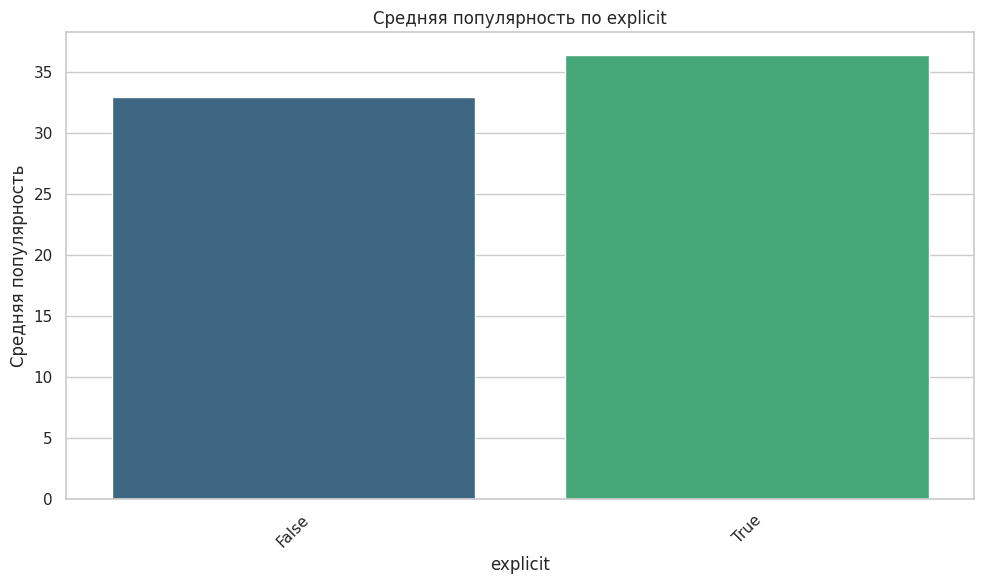

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = data
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce') #проверка 'popularity' на числовые значения
                                  
def plot_categorical_vs_popularity(data, category, top_n=10):
    plt.figure(figsize=(10, 6)) # функция для построения графикa
    
    popularity_by_category = data.groupby(category)['popularity'].mean().reset_index()  #популярность для каждого значения категориального признака

    top_categories = popularity_by_category.sort_values(by='popularity', ascending=False).head(top_n) #сортировка по популярности

    sns.barplot(data=top_categories, x=category, y='popularity', palette='viridis')
    plt.title(f'Средняя популярность по {category}')
    plt.xlabel(category)
    plt.ylabel('Средняя популярность')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()   #столбчатая диаграмма

plot_categorical_vs_popularity(df, 'track_genre', top_n=10)
plot_categorical_vs_popularity(df, 'explicit')

In [35]:
import pandas as pd
df['track_name_length'] = df['track_name'].str.len()  #длина названия трека
print(df[['track_name', 'track_name_length']].head()) #проверка добавленного столбца

                   track_name  track_name_length
0                      Comedy                6.0
1            Ghost - Acoustic               16.0
2              To Begin Again               14.0
3  Can't Help Falling In Love               26.0
4                     Hold On                7.0


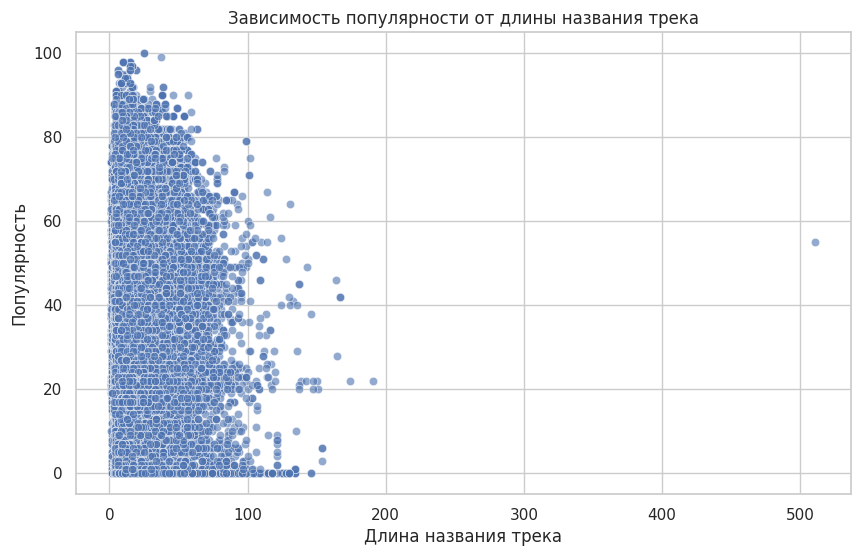

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['track_name_length'] = df['track_name'].str.len() 

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='track_name_length', y='popularity', alpha=0.6) 

plt.title('Зависимость популярности от длины названия трека')
plt.xlabel('Длина названия трека')
plt.ylabel('Популярность')
plt.grid(True)

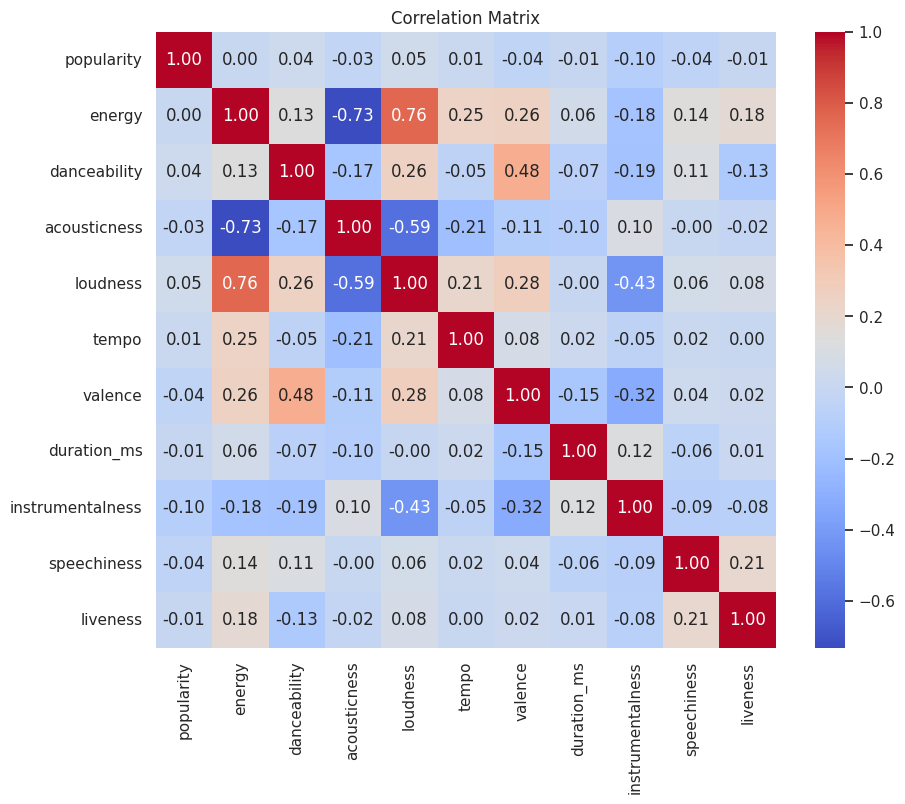

In [37]:
# распределение числовых признаков
numeric_fearures = ['popularity', 'energy', 'danceability', 'acousticness', 'loudness', 'tempo', 'valence', 'duration_ms', 'instrumentalness', 'speechiness', 'liveness']
# корреляционная матрица
corr_matrix = data[numeric_fearures].corr()
# визуализация
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

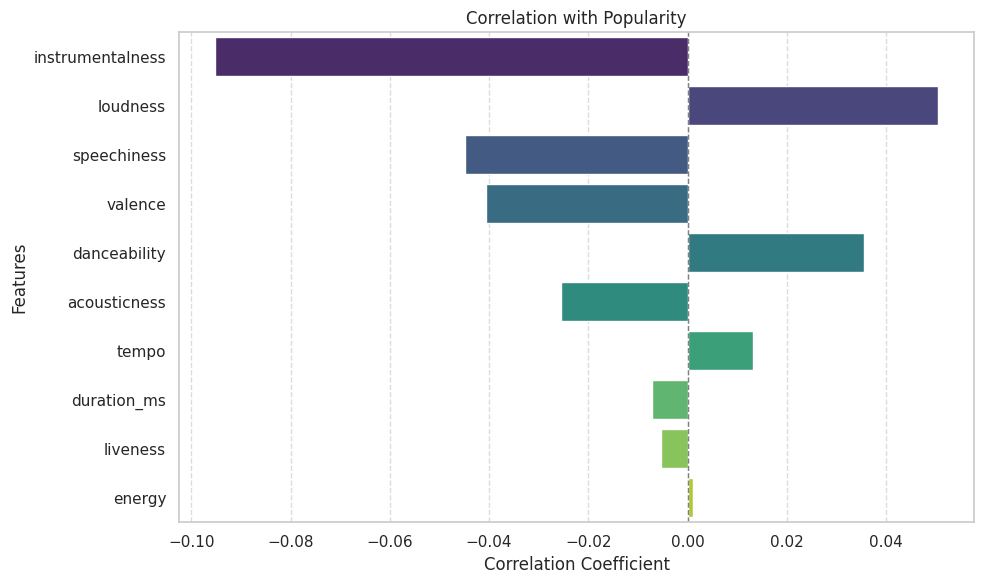

In [55]:
popularity_corr = corr_matrix['popularity'].drop('popularity').sort_values(key=abs, ascending=False) #Корреляция с популярностью

plt.figure(figsize=(10, 6))
sns.barplot(x=popularity_corr.values, y=popularity_corr.index, palette='viridis')
plt.title('Correlation with Popularity')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() #Визуализация

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Unnamed: 0             113999 non-null  int64   
 1   track_id               113999 non-null  object  
 2   artists                113999 non-null  object  
 3   album_name             113999 non-null  object  
 4   track_name             113999 non-null  object  
 5   popularity             113999 non-null  int64   
 6   duration_ms            113999 non-null  int64   
 7   explicit               113999 non-null  bool    
 8   danceability           113999 non-null  float64 
 9   energy                 113999 non-null  float64 
 10  key                    113999 non-null  int64   
 11  loudness               113999 non-null  float64 
 12  mode                   113999 non-null  int64   
 13  speechiness            113999 non-null  float64 
 14  acousticness           11

In [62]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
level_category = data.select_dtypes(include=['category']).columns.tolist()

In [63]:
categorical_features

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

In [64]:
level_category

['danceability_category',
 'energy_category',
 'loudness_category',
 'speechiness_category',
 'acousticness_category',
 'tempo_category',
 'valence_category',
 'liveness_category']

In [70]:
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}

In [74]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Unnamed: 0             113999 non-null  int64   
 1   track_id               113999 non-null  int64   
 2   artists                113999 non-null  int64   
 3   album_name             113999 non-null  int64   
 4   track_name             113999 non-null  int64   
 5   popularity             113999 non-null  int64   
 6   duration_ms            113999 non-null  int64   
 7   explicit               113999 non-null  bool    
 8   danceability           113999 non-null  float64 
 9   energy                 113999 non-null  float64 
 10  key                    113999 non-null  int64   
 11  loudness               113999 non-null  float64 
 12  mode                   113999 non-null  int64   
 13  speechiness            113999 non-null  float64 
 14  acousticness           11

In [76]:
corr_matrix = (data[categorical_features + ['popularity']]).corr()

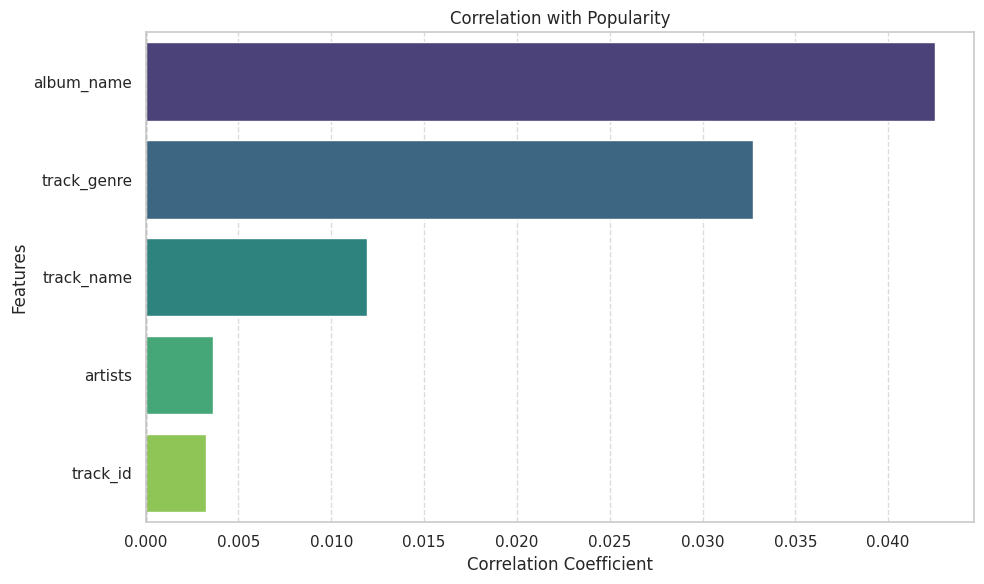

In [78]:
# корреляция с популярностью
popularity_corr = corr_matrix['popularity'].drop('popularity').sort_values(key=abs, ascending = False)
# график
plt.figure(figsize=(10, 6))
sns.barplot(x=popularity_corr.values, y=popularity_corr.index, palette="viridis")
plt.title('Correlation with Popularity')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Unnamed: 0             113999 non-null  int64   
 1   track_id               113999 non-null  int64   
 2   artists                113999 non-null  int64   
 3   album_name             113999 non-null  int64   
 4   track_name             113999 non-null  int64   
 5   popularity             113999 non-null  int64   
 6   duration_ms            113999 non-null  int64   
 7   explicit               113999 non-null  bool    
 8   danceability           113999 non-null  float64 
 9   energy                 113999 non-null  float64 
 10  key                    113999 non-null  int64   
 11  loudness               113999 non-null  float64 
 12  mode                   113999 non-null  int64   
 13  speechiness            113999 non-null  float64 
 14  acousticness           11

In [80]:
data = data.drop(columns=['energy', 'Unnamed:0', 'track_id'], errors='ignore')

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Unnamed: 0             113999 non-null  int64   
 1   artists                113999 non-null  int64   
 2   album_name             113999 non-null  int64   
 3   track_name             113999 non-null  int64   
 4   popularity             113999 non-null  int64   
 5   duration_ms            113999 non-null  int64   
 6   explicit               113999 non-null  bool    
 7   danceability           113999 non-null  float64 
 8   key                    113999 non-null  int64   
 9   loudness               113999 non-null  float64 
 10  mode                   113999 non-null  int64   
 11  speechiness            113999 non-null  float64 
 12  acousticness           113999 non-null  float64 
 13  instrumentalness       113999 non-null  float64 
 14  liveness               11

In [82]:
level_category

['danceability_category',
 'energy_category',
 'loudness_category',
 'speechiness_category',
 'acousticness_category',
 'tempo_category',
 'valence_category',
 'liveness_category']

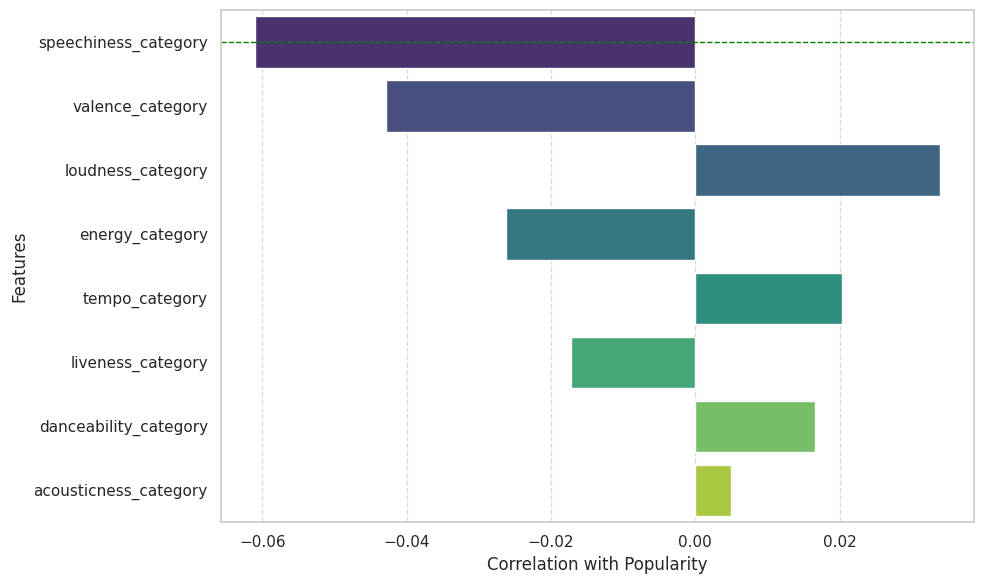

In [110]:
# Создаем копию данных, чтобы не изменять оригинальный DataFrame
data_encoded = data.copy()

# Преобразуем категориальные колонки в числовые коды
for col in level_category:
    data_encoded[col] = data_encoded[col].cat.codes

# Теперь вычисляем корреляцию только для категорий и 'popularity'
corr_matrix = data_encoded[level_category + ['popularity']].corr()

# Извлекаем корреляции категорий с 'popularity'
popularity_corr = corr_matrix['popularity'].drop('popularity').sort_values(key=abs, ascending=False)

# Строим график
plt.figure(figsize=(10, 6))
sns.barplot(x=popularity_corr.values, y=popularity_corr.index, palette='viridis')
plt.xlabel('Correlation with Popularity')
plt.ylabel('Features')
plt.axhline(0, color="green", linestyle='--', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [111]:
# разделение данных на обучающую и тестовую выборки
x = data.drop(columns = ['popularity']) # изменение на целевой признак
y = data['popularity'] #изменение на целевой признак
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2,random_state= 42)

In [113]:
import tensorflow as tf
from tensorflow import keras

In [116]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

# Преобразование категориальных столбцов в числовые
label_encoder = LabelEncoder()
for col in ['danceability_category', 'energy_category', 'loudness_category',
            'speechiness_category', 'acousticness_category', 'tempo_category',
            'valence_category', 'liveness_category']:
    x_train[col] = label_encoder.fit_transform(x_train[col])
    x_test[col] = label_encoder.transform(x_test[col])

# Заполняем пропущенные значения
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)

# Конвертация в числовой формат
x_train = np.array(x_train, dtype='float64')
x_test = np.array(x_test, dtype='float64')

# Масштабирование данных
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Модель
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Оценка модели
loss = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 623.8770 - val_loss: 476.6506
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 469.7749 - val_loss: 470.6840
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 461.0544 - val_loss: 461.1802
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 451.1968 - val_loss: 455.1936
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 444.7005 - val_loss: 449.9947
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 438.0165 - val_loss: 446.0851
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 431.5925 - val_loss: 441.6959
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 427.8512 - val_loss: 440.2654
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 422.1535 - val_loss: 438.9380
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 419.9334 - val_loss: 437.0914
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - loss: 436.9641
Test Loss: 430.5152

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Unnamed: 0             113999 non-null  int64   
 1   artists                113999 non-null  int64   
 2   album_name             113999 non-null  int64   
 3   track_name             113999 non-null  int64   
 4   popularity             113999 non-null  int64   
 5   duration_ms            113999 non-null  int64   
 6   explicit               113999 non-null  bool    
 7   danceability           113999 non-null  float64 
 8   key                    113999 non-null  int64   
 9   loudness               113999 non-null  float64 
 10  mode                   113999 non-null  int64   
 11  speechiness            113999 non-null  float64 
 12  acousticness           113999 non-null  float64 
 13  instrumentalness       113999 non-null  float64 
 14  liveness               11

In [125]:
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_absolute_error(y_test, y_pred)
rmse = mse**0.5
print(f'MAE:{mae}')
print(f'RMSE:{rmse}')

MAE:10.71863552631579
RMSE:3.2739327308782307


In [152]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print (mape)

8977694751392731.0


In [ ]:
result = permutation_importance(model, x_test, y_test, n_repeats=10,random_state= 42,scoring= "neg_mean_absolute_error")
importances = pd.Series(result.importances_mean, index=x.columns)

importances.sort_values().plot(kind = 'barh', figsize = (10, 6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение МАЕ')
plt.show()